# Variando K

- k vs. accuaracy
- k vs. tiempo de ejecición

In [4]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import sentiment

%load_ext autoreload
%autoreload 2


!cd ../data && tar -xvf *.tgz
!cd ../data && tar -xvf *.tar.gz

mkdir: build: File exists
-- The C compiler identification is AppleClang 11.0.0.11000033
-- The CXX compiler identification is AppleClang 11.0.0.11000033
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp

In [5]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("../data/imdb_small.csv", index_col=0)

# Aca se pueden tomar menos muestras para hacer preubas chicas
df = df[0:200]

print("Cantidad de documentos: {}".format(df.shape[0]))

df.describe()

text_train = df[df.type == 'train']["review"]
label_train = df[df.type == 'train']["label"]

text_test = df[df.type == 'test']["review"]
label_test = df[df.type == 'test']["label"]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))

print("Class balance : {} pos {} neg".format(
    (label_train == 'pos').sum() / label_train.shape[0], 
    (label_train == 'neg').sum() / label_train.shape[0]
))

vectorizer = CountVectorizer(max_df=0.70, min_df=0.1, max_features=5000)

vectorizer.fit(text_train)

X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

Cantidad de documentos: 200
Cantidad de instancias de entrenamiento = 94
Cantidad de instancias de test = 106
Class balance : 0.4574468085106383 pos 0.5425531914893617 neg


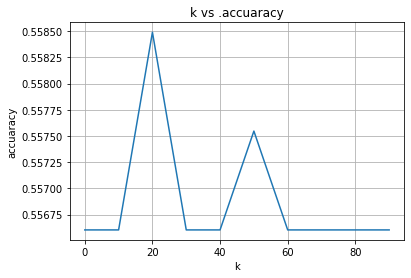

In [8]:
import sentiment
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 100, 10)
accs = []

for i in t:
    clf = sentiment.KNNClassifier(100)
    clf.fit(X_train, y_train)
    
    acc = 0
    its = 10
    for it in range(its):
        y_pred = clf.predict(X_test)
        acc += accuracy_score(y_test, y_pred)
    accs.append(acc/its)
    
fig, ax = plt.subplots()
ax.plot(t, accs)

ax.set(xlabel='k', ylabel='accuaracy',
       title='k vs .accuaracy')
ax.grid()

#fig.savefig("test.png")
plt.show()